In [1053]:
import pandas as pd
import matplotlib.pyplot as plt
import typing as tp
from matplotlib.axes import Axes

In [1054]:
df = pd.read_csv("cat_exam_data.csv", sep=',')
df

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971
...,...,...,...
501557,52,65.0,1361
501558,412,37.0,1032
501559,165,80.0,974
501560,426,47.0,899


In [1055]:
new_df = df[df['test_score'] == 100].sort_values('school')
tmp = new_df.groupby(by='school').agg({'test_score' : len, 'number_of_students': ['mean']}).reset_index(drop=False)
tmp.columns = ['school', 'cnt_100', 'number_of_students']
tmp = tmp[['school', 'number_of_students', 'cnt_100']]
tmp.sort_values(by=['cnt_100', 'school'], ascending=(False, True))

,school,number_of_students,cnt_100
48,486,800.0,2
0,4,1015.0,1
1,14,777.0,1
2,18,715.0,1
3,42,650.0,1
4,69,1012.0,1
5,82,555.0,1
6,90,1244.0,1
7,91,749.0,1
8,96,943.0,1


In [1056]:
new_df = df.groupby('school').mean()
new_df.sort_values(by='test_score', ascending=False).reset_index(drop=False).head(10)

,school,test_score,number_of_students
0,57,53.341682,560.0
1,124,52.993311,598.0
2,263,52.982063,669.0
3,82,52.981982,555.0
4,366,52.970207,773.0
5,465,52.957555,1179.0
6,169,52.932401,858.0
7,449,52.910364,357.0
8,477,52.898515,808.0
9,464,52.865429,431.0


In [1057]:
# df_group = df.groupby(by='school')
# A = pd.DataFrame()
# B = pd.DataFrame()
# a = []
# b = []
# for name, group in df_group:
#     if len(df_group.get_group(name)) > 1000:
#         a.append(name)
#         A = pd.merge(A, df_group.get_group(name))
#     else:
#         B = pd.merge(B, df_group.get_group(name))
#         b.append(name)
# A

Text(0.5, 1.0, 'Распределение средних баллов по ученикам из больших и небольших школ')

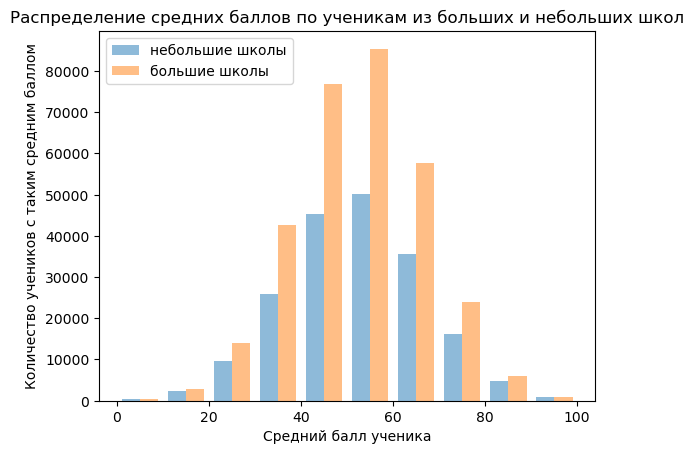

In [1058]:
df_less_1000 = df[df['number_of_students'] <= 1000].reset_index()
df_more_1000 = df[df['number_of_students'] > 1000].reset_index()

fig, ax = plt.subplots()
ax.hist([df_less_1000['test_score'], df_more_1000['test_score']], bins=10, alpha=0.5, label=['небольшие школы', 'большие школы'])

ax.legend(loc = 'upper left')

ax.set_xlabel('Средний балл ученика')
ax.set_ylabel('Количество учеников с таким средним баллом')

plt.title("Распределение средних баллов по ученикам из больших и небольших школ")


Text(0.5, 0, 'Очки студента')

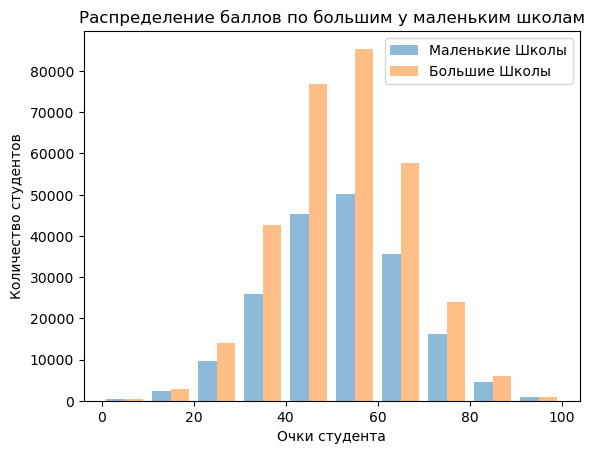

In [1059]:
df_less_1000 = df[df['number_of_students'] <= 1000].reset_index()
df_more_1000 = df[df['number_of_students'] > 1000].reset_index()

b, a = plt.subplots()
a.hist([df_less_1000['test_score'], df_more_1000['test_score']], bins=10, alpha=0.5, label=['Маленькие Школы', 'Большие Школы'])
a.legend(loc = 'upper right')

plt.title('Pаспределение баллов по большим у маленьким школам')

a.set_ylabel('Количество студентов')
a.set_xlabel('Очки студента')


In [1060]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school,501562.0,250.095661,144.428841,0.0,125.0,250.0,377.0,499.0
test_score,501358.0,51.681788,14.179981,0.0,42.0,52.0,61.0,100.0
number_of_students,501562.0,1088.868830,281.022934,156.0,890.0,1079.0,1285.0,1806.0
